**Task 3: Customer Segmentation / Clustering**

Perform customer segmentation using clustering techniques. Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).

  ●
You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)

  ●
Calculate clustering metrics, including the DB Index(Evaluation will be done on this).

  ●
Visualise your clusters using relevant plots.

Deliverables:

  ●
A report on your clustering results, including:

  ○
The number of clusters formed.

○
DB Index value.

○
Other relevant clustering metrics.

●
A Jupyter Notebook/Python script containing your clustering code.

Evaluation Criteria:

●
Clustering logic and metrics.

●
Visual representation of clusters.

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Merge datasets for feature engineering
merged_data = transactions.merge(products, on='ProductID', how='left')
merged_data = merged_data.merge(customers, on='CustomerID', how='left')

In [4]:
# Feature Engineering
# 1. Lifetime value (total spending)
lifetime_value = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
lifetime_value.columns = ['CustomerID', 'LifetimeValue']


In [5]:
# 2. Product preferences (category-wise spending)
category_spending = merged_data.groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack(fill_value=0).reset_index()


In [6]:
# 3. Frequency of purchases (number of transactions)
transaction_frequency = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_frequency.columns = ['CustomerID', 'TransactionFrequency']


In [7]:
# Combine features into a single DataFrame
features = customers.merge(lifetime_value, on='CustomerID', how='left')
features = features.merge(transaction_frequency, on='CustomerID', how='left')
features = features.merge(category_spending, on='CustomerID', how='left')

In [8]:
# Fill missing values with 0
features.fillna(0, inplace=True)

In [9]:
# Normalize features for similarity calculation
scaler = MinMaxScaler()
feature_columns = features.select_dtypes(include=['number']).columns[2:]
features_normalized = pd.DataFrame(scaler.fit_transform(features[feature_columns]), columns=feature_columns, index=features.index)
features_normalized['CustomerID'] = features['CustomerID']

In [10]:
# Clustering using KMeans
X = features_normalized.drop('CustomerID', axis=1)

In [11]:
# Determine the optimal number of clusters using Davies-Bouldin Index
db_scores = []
clusters_range = range(2, 11)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

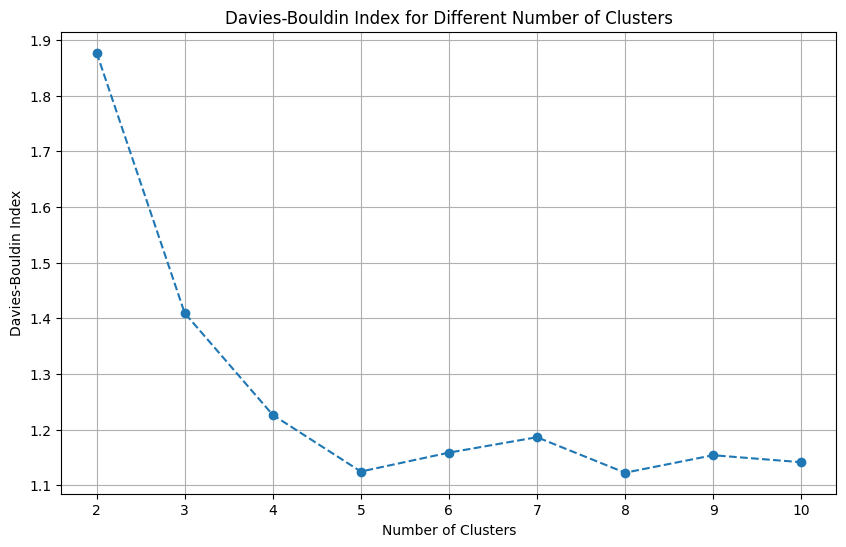

In [12]:
# Plot DB Index for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, db_scores, marker='o', linestyle='--')
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(clusters_range)
plt.grid()
plt.show()


In [13]:
# Choose the optimal number of clusters (e.g., k with the lowest DB Index)
optimal_k = clusters_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 8


In [14]:
# Final KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
features_normalized['Cluster'] = kmeans.fit_predict(X)

In [20]:
# Calculate Silhouette Score for the optimal clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 8 clusters: 0.2559487466438625


In [21]:
# Calculate Inertia (WCSS) for the optimal clusters
inertia = kmeans.inertia_
print(f"Inertia (WCSS) for {optimal_k} clusters: {inertia}")

Inertia (WCSS) for 8 clusters: 13.702436464014168


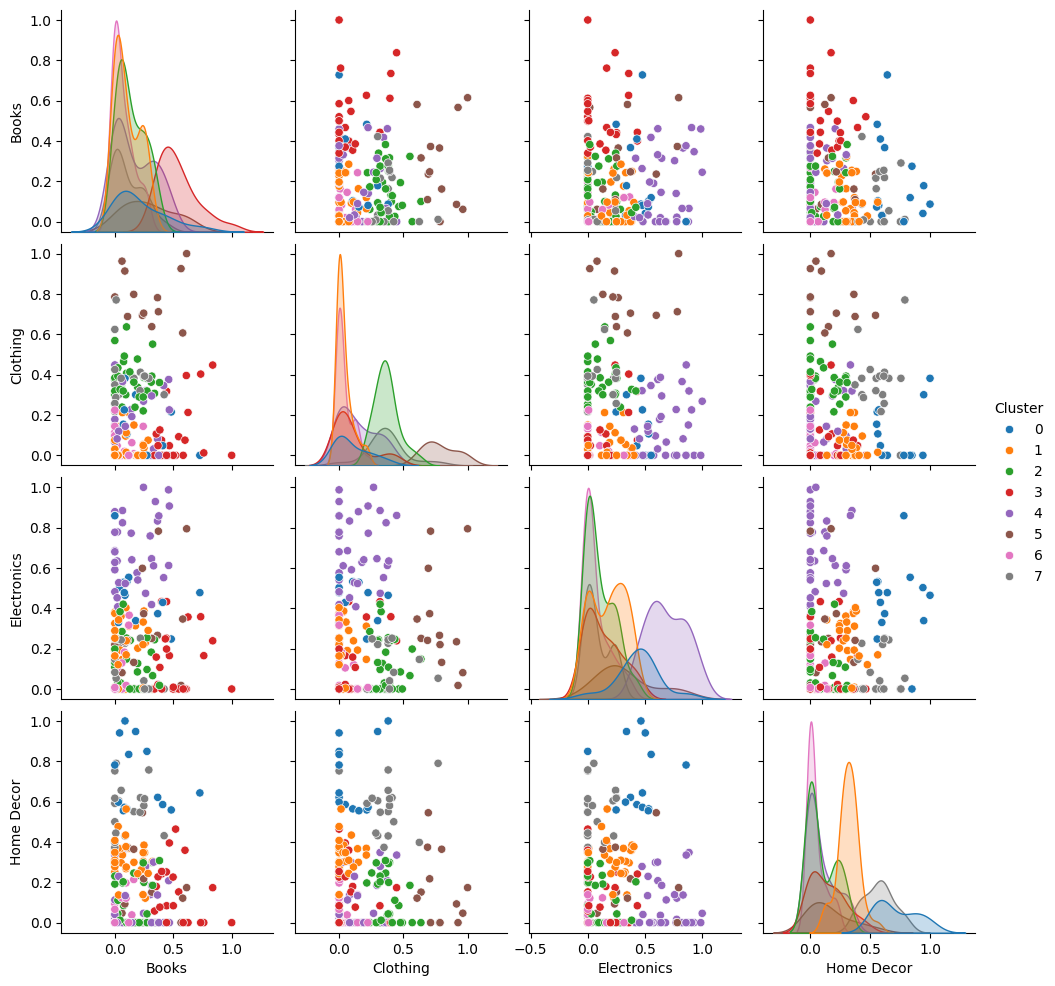

In [15]:
# Visualize clusters
sns.pairplot(features_normalized, hue='Cluster', palette='tab10', diag_kind='kde')
plt.show()

In [22]:
# Save clustering results
clustering_results = features[['CustomerID']].copy()
clustering_results['Cluster'] = features_normalized['Cluster']
clustering_results.to_csv("Customer_Segments.csv", index=False)

# Print clustering metrics
print(f"Davies-Bouldin Index for optimal clusters: {min(db_scores)}")
print(f"Silhouette Score for optimal clusters: {silhouette_avg}")
print(f"Inertia (WCSS) for optimal clusters: {inertia}")
print("Clustering results saved to Customer_Segments.csv")

Davies-Bouldin Index for optimal clusters: 1.122437101123492
Silhouette Score for optimal clusters: 0.2559487466438625
Inertia (WCSS) for optimal clusters: 13.702436464014168
Clustering results saved to Customer_Segments.csv


**Clustering Results**

**Optimal Number of Clusters:**
Based on the Davies-Bouldin Index (DBI), the optimal number of clusters identified was 8.

**Davies-Bouldin Index (DBI):**
The DB Index for the 8 clusters is 1.1224, indicating a good balance between cluster separation and compactness.

**Silhouette Score:**
The Silhouette Score for the optimal clustering was 0.2559, suggesting moderate cluster quality. This indicates that some clusters are distinct, while others may slightly overlap.

**Inertia (WCSS):**
The Within-Cluster Sum of Squares (WCSS) for the 8 clusters was 13.7024, reflecting the compactness of the clusters.